In [1]:
import pandas as pd

# 读取数据
data = pd.read_csv("data/dataset.csv")
data

,O,N,SSA,PV,RMIC,Dap,ID/IG,M,Anion,AML,PW,CD,Cs
0,7.15,3.52,1546.1,0.5753,93.985747,1.488390,1.029,2,1,1.0,1.6,0.10,85.0
1,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,0.10,90.2
2,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,0.25,86.3
3,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,0.50,79.9
4,21.55,3.29,1140.8,0.8600,20.930233,3.015428,0.820,1,0,2.5,1.8,1.00,70.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,1.00,90.1
596,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,2.00,84.7
597,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,5.00,75.5
598,11.38,8.71,499.8,0.5043,20.488195,4.040000,1.070,2,1,3.0,1.6,8.00,69.4


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data['target_class'] = pd.qcut(data['Cs'], q=10, labels=False)
X = data.drop(['Cs', 'target_class'], axis=1)
y = data['Cs']
stratify_column = data['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=stratify_column)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# 线性回归 Linear Regression

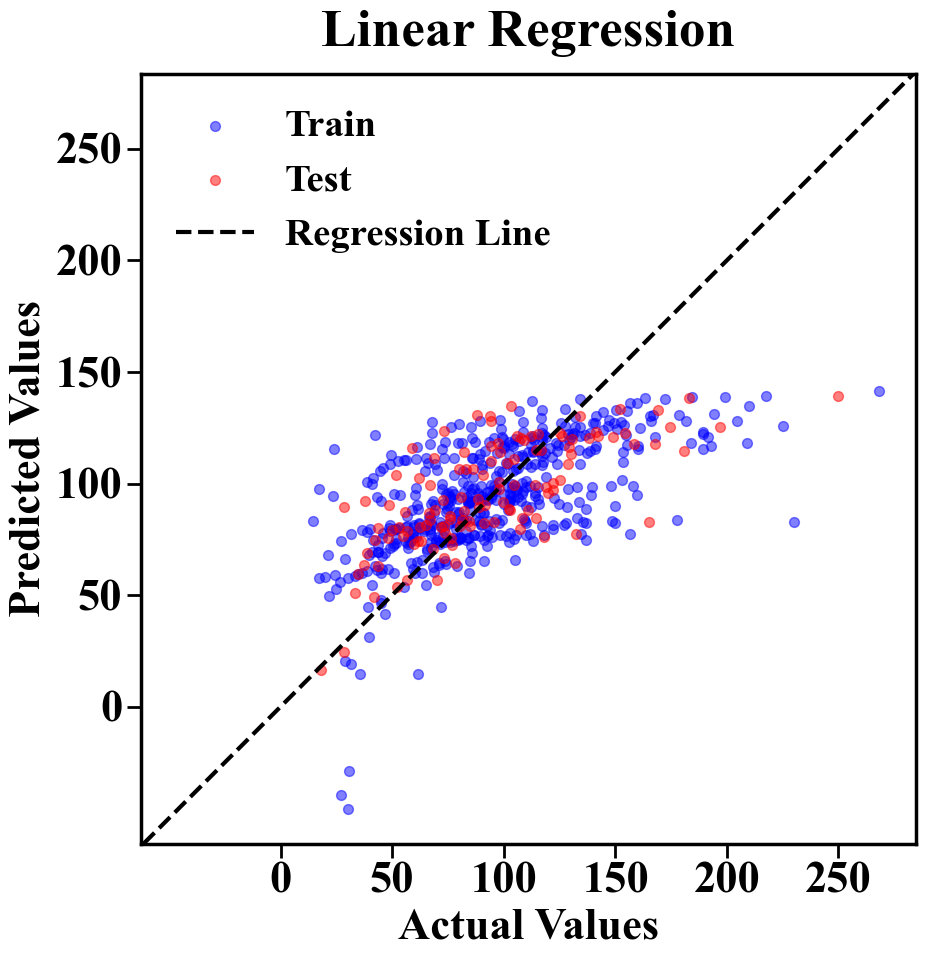

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Linear Regression,0.39119,23.192948,33.520184,31.148635,0.476773,21.80851,27.6218,28.706683


In [3]:
from function import metrics_to_dataframe, plot_actual_vs_predicted
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

lr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Linear Regression')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Linear Regression','output/figures/lr.png')

lr_metrics

# 支持向量回归Support Vector Regression

[LibSVM]

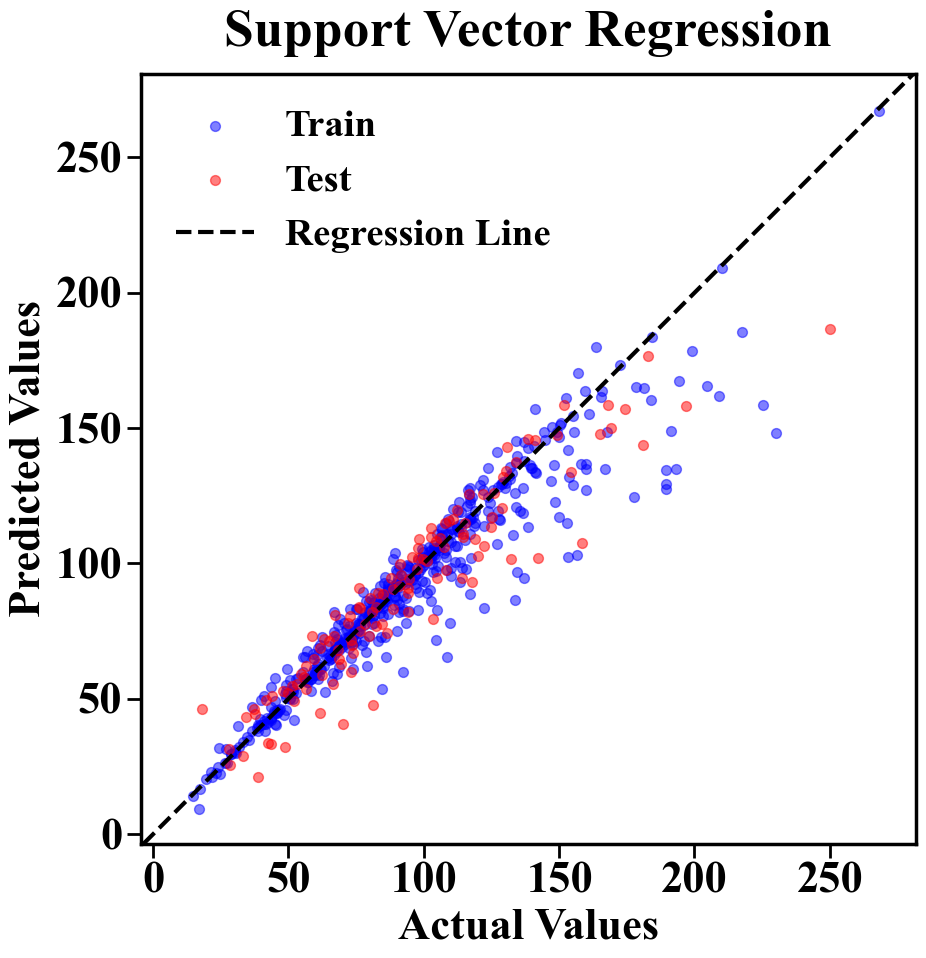

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Support Vector Regression,0.892775,7.116614,6.89433,13.072148,0.873871,9.668162,11.693801,14.094382


In [4]:
from sklearn.svm import SVR

svr = SVR(
    C=5, 
    kernel='poly', 
    degree=5, 
    gamma='scale', 
    coef0=5, 
    epsilon=0.75, 
    verbose=True
)

svr.fit(X_train_scaled, y_train)

y_train_pred = svr.predict(X_train_scaled)
y_test_pred = svr.predict(X_test_scaled)

svr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Support Vector Regression')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Support Vector Regression', 'output/figures/svr.png')

svr_metrics

# 随机森林回归Random Forest Regression

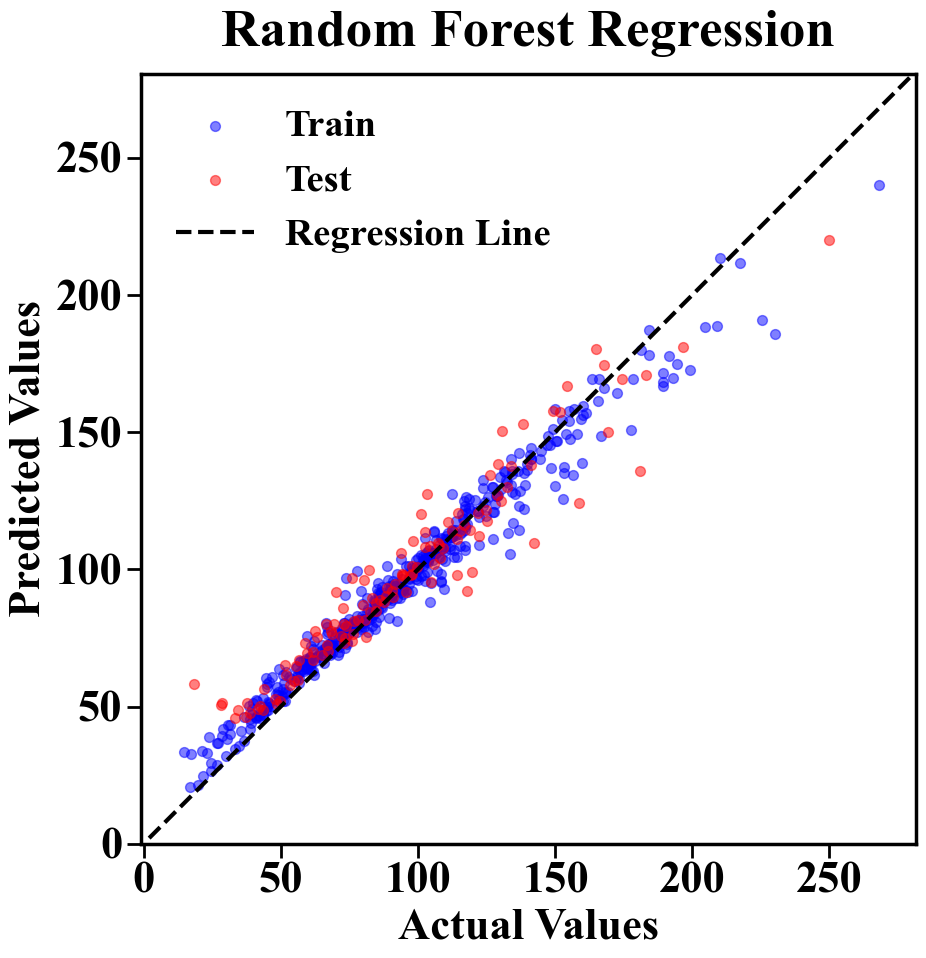

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Randon Forest Regression,0.960819,5.498653,7.558199,7.901973,0.905111,8.879863,12.823092,12.224952


In [5]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100,
                            max_depth=10,
                            min_samples_leaf=1,
                            min_samples_split=2,
                            max_features=1,
                            random_state=21)
rfr.fit(X_train_scaled, y_train)

y_train_pred = rfr.predict(X_train_scaled)
y_test_pred = rfr.predict(X_test_scaled)

rfr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Randon Forest Regression')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Random Forest Regression','output/figures/rfr.png')

rfr_metrics

# 梯度提升回归Gradient Boosting Regression

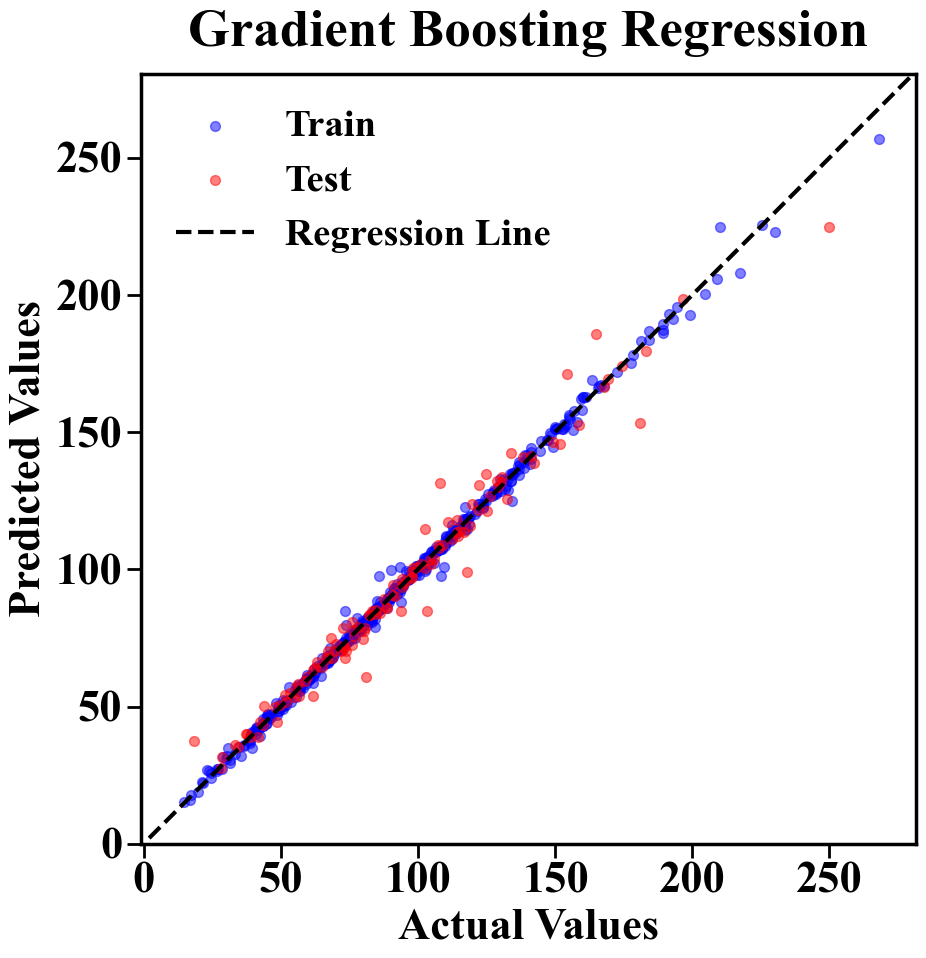

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Gradient Boosting Regression,0.997049,1.272753,1.553184,2.168557,0.971301,3.892045,4.805682,6.72316


In [6]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=270,
                                alpha=0.001,
                                learning_rate=0.1,
                                max_depth=17,
                                max_features=0.89,
                                min_samples_leaf=9,
                                min_samples_split=4,
                                subsample=0.68,
                                random_state=21)
gbr.fit(X_train_scaled, y_train)

y_train_pred = gbr.predict(X_train_scaled)
y_test_pred = gbr.predict(X_test_scaled)

gbr_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'Gradient Boosting Regression')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'Gradient Boosting Regression','output/figures/gbr.png')

gbr_metrics

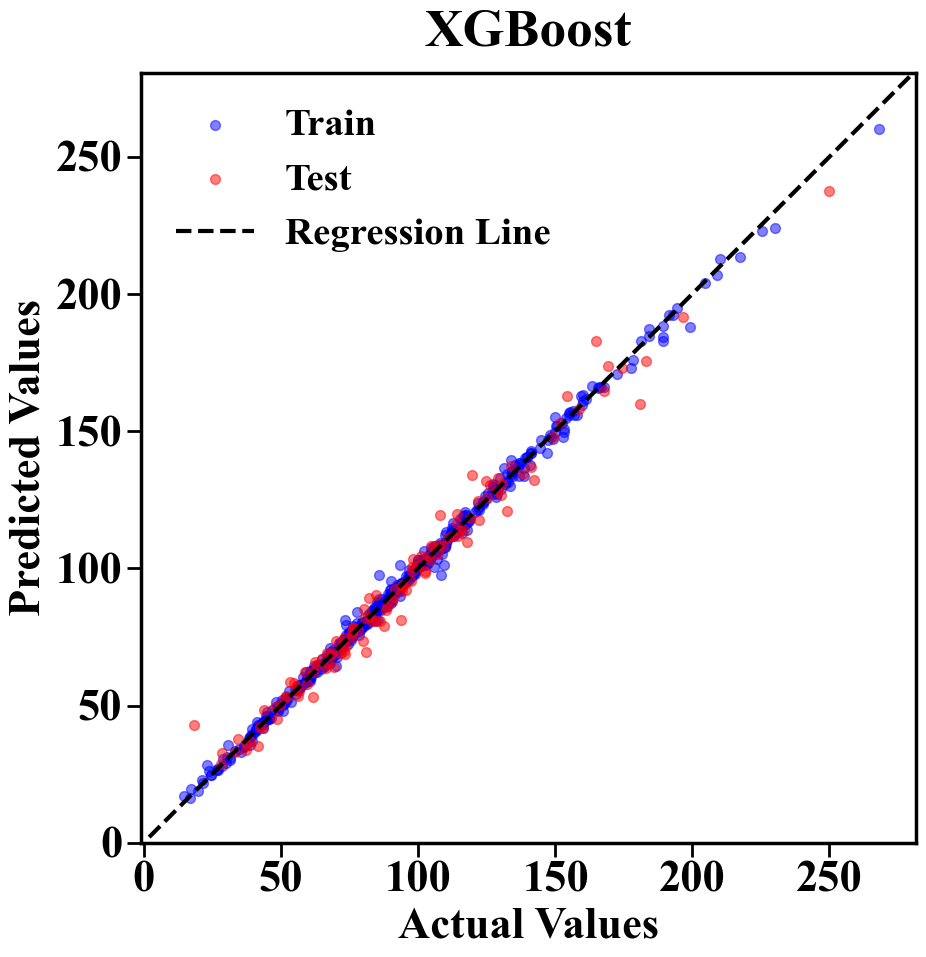

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,XGBoost,0.997319,1.385717,1.70207,2.066959,0.98047,3.760337,5.113897,5.546176


In [7]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=240,
                   learning_rate=0.1,
                   subsample=0.66,
                   gamma=1,
                   max_depth=22,
                   min_child_weight=3,
                   reg_alpha=1,
                   colsample_bytree=0.6,
                   colsample_bylevel=0.6,
                   colsample_bynode=0.6,
                   random_state=21)
xgb.fit(X_train_scaled, y_train)

y_train_pred = xgb.predict(X_train_scaled)
y_test_pred = xgb.predict(X_test_scaled)

xgb_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'XGBoost')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'XGBoost','output/figures/XGB.png')

xgb_metrics

# LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 12
[LightGBM] [Info] Start training from score 93.467937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

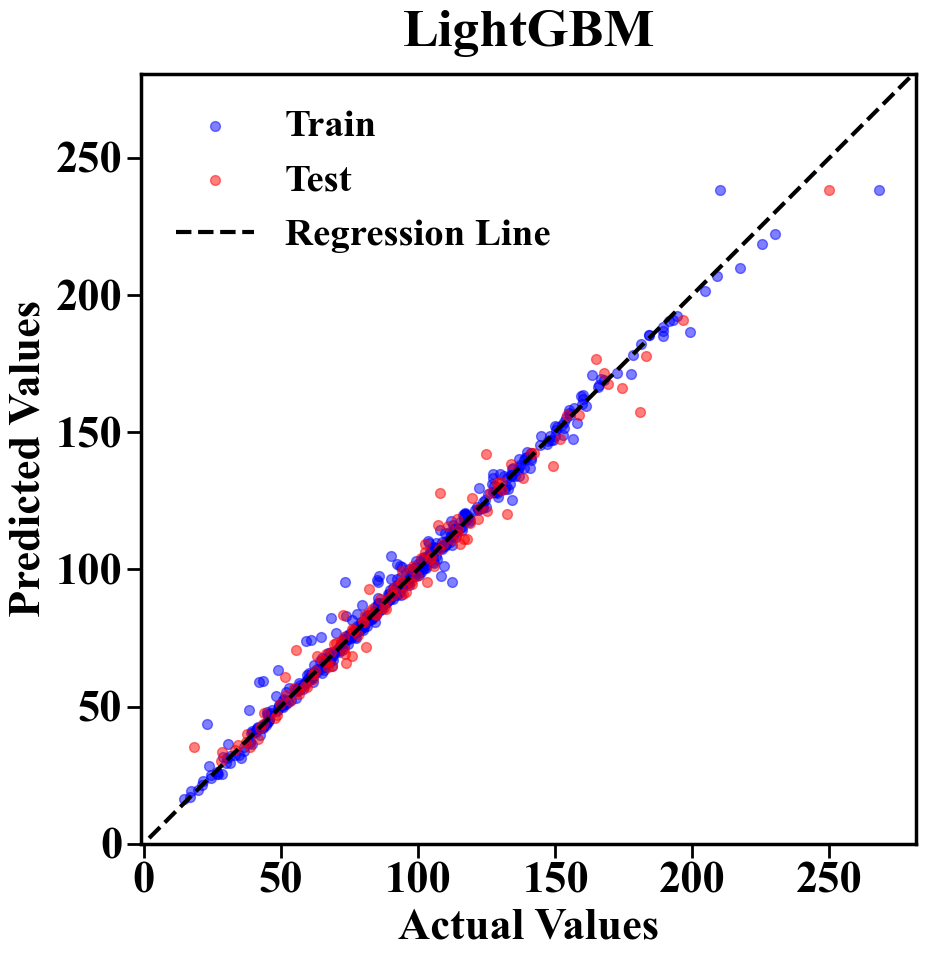

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,LightGBM,0.989847,2.173967,2.82352,4.022474,0.979421,3.887813,4.984652,5.693182


In [8]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(
    colsample_bytree=0.5,
    learning_rate=0.12,
    max_depth=25,
    min_child_samples=12,
    n_estimators=240,
    num_leaves=95,
    reg_alpha=0.13,
    reg_lambda=0.23,
    subsample=0.95,
    random_state=21
)

lgbm.fit(X_train_scaled, y_train)

y_train_pred = lgbm.predict(X_train_scaled)
y_test_pred = lgbm.predict(X_test_scaled)

lgbm_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'LightGBM')
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'LightGBM','output/figures/LightGBM.png')

lgbm_metrics

In [9]:
metrics = pd.concat([lr_metrics,svr_metrics, rfr_metrics, gbr_metrics, lgbm_metrics, xgb_metrics])
metrics_rounded = metrics.round(3)
metrics_rounded.to_markdown('output/report_models.md', index=False, tablefmt='github')
metrics_rounded

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,Linear Regression,0.391,23.193,33.520,31.149,0.477,21.809,27.622,28.707
0,Support Vector Regression,0.893,7.117,6.894,13.072,0.874,9.668,11.694,14.094
0,Randon Forest Regression,0.961,5.499,7.558,7.902,0.905,8.880,12.823,12.225
0,Gradient Boosting Regression,0.997,1.273,1.553,2.169,0.971,3.892,4.806,6.723
0,LightGBM,0.990,2.174,2.824,4.022,0.979,3.888,4.985,5.693
0,XGBoost,0.997,1.386,1.702,2.067,0.980,3.760,5.114,5.546
